In [1]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [2]:
# Pip install method (recommended)

!pip install -U ultralytics supervision roboflow




from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.79 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6170.1/8062.4 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dHveoW3xmLy8YlRhLx14")
project = rf.workspace("try-6siwu").project("thirdvision-with-blunt-objects-without-sumpak")
version = project.version(1)
dataset = version.download("yolov11")
                
                
                
                


/kaggle/working/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to thirdvision-with-blunt-objects-without-sumpak-1 in yolov11:: 100%|██████████| 16424/16424 [00:02<00:00, 6712.07it/s]


## Custom Training

In [5]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

100%|██████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 72.4MB/s]
Ultralytics 8.3.79 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

100%|████████████████████████████████████████| 104k/104k [00:00<00:00, 39.6MB/s]
image 1/1 /kaggle/working/datasets/dog.jpeg: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 77.6ms
Speed: 16.3ms preprocess, 77.6ms inference, 546.1ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11n.pt data={dataset.location}/data.yaml epochs=25 imgsz=416 plots=True

/kaggle/working
100%|██████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 73.7MB/s]
Ultralytics 8.3.79 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/datasets/thirdvision-with-blunt-objects-without-sumpak-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, reti

/kaggle/working


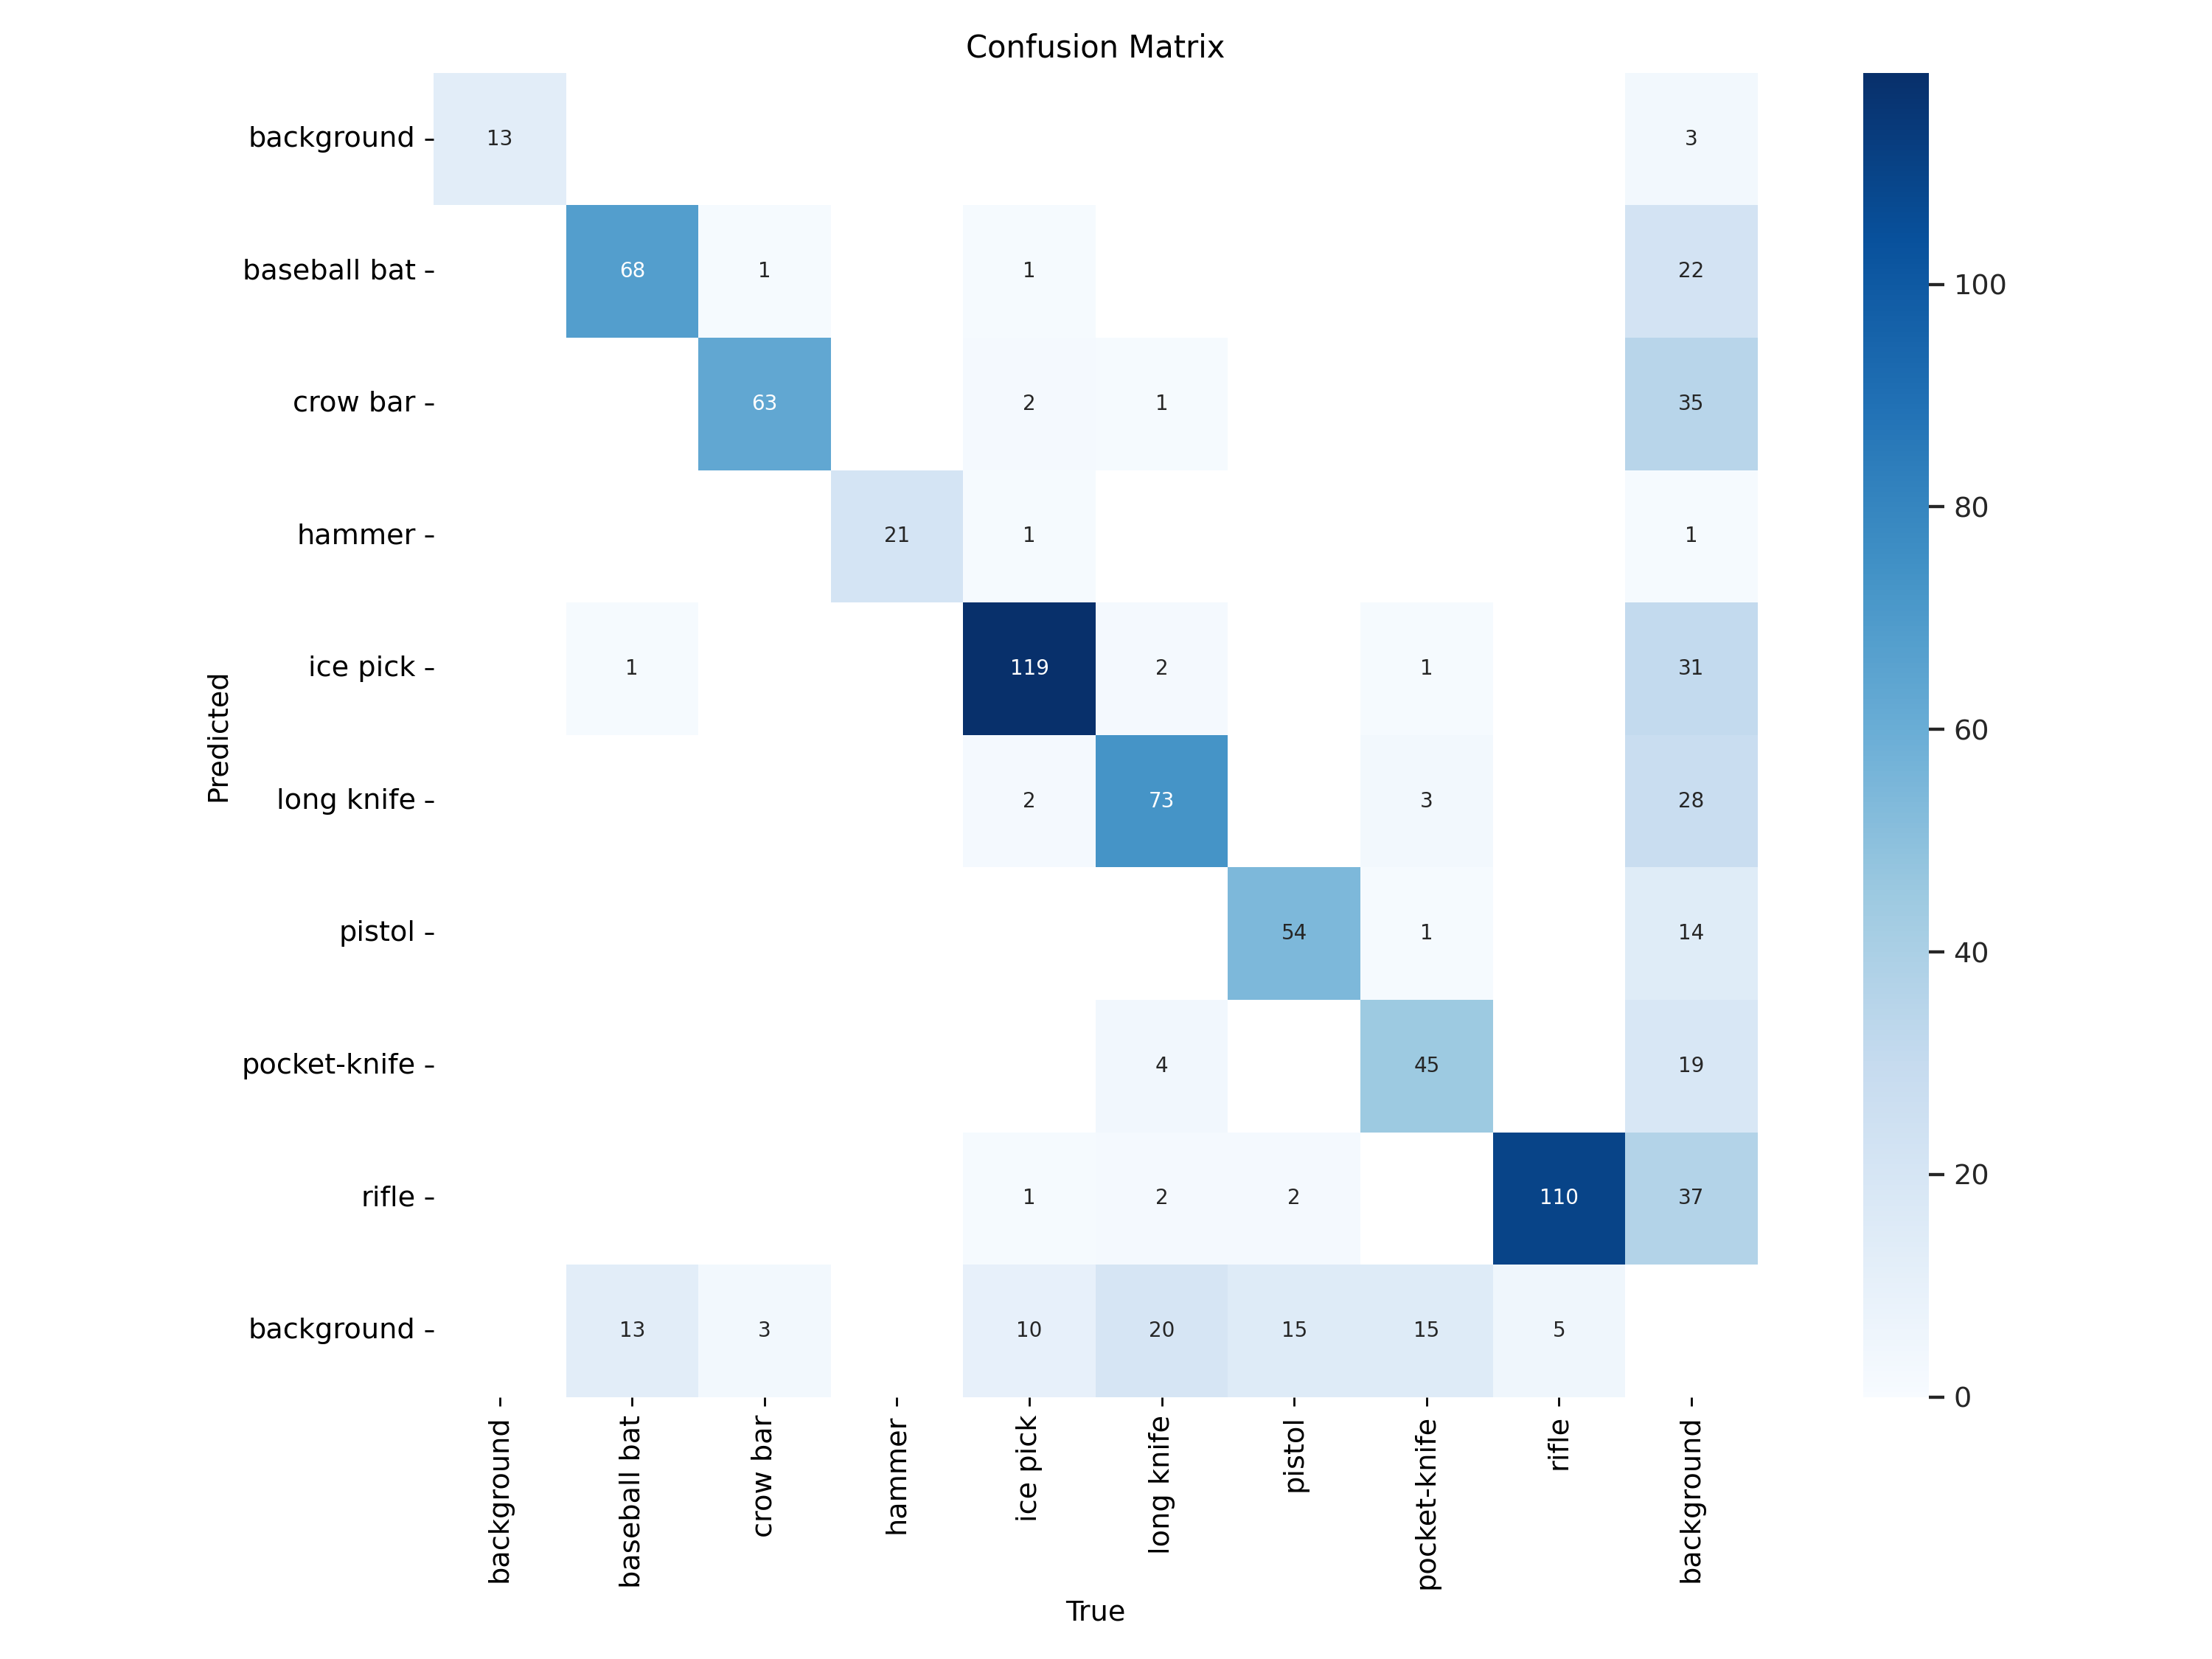

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


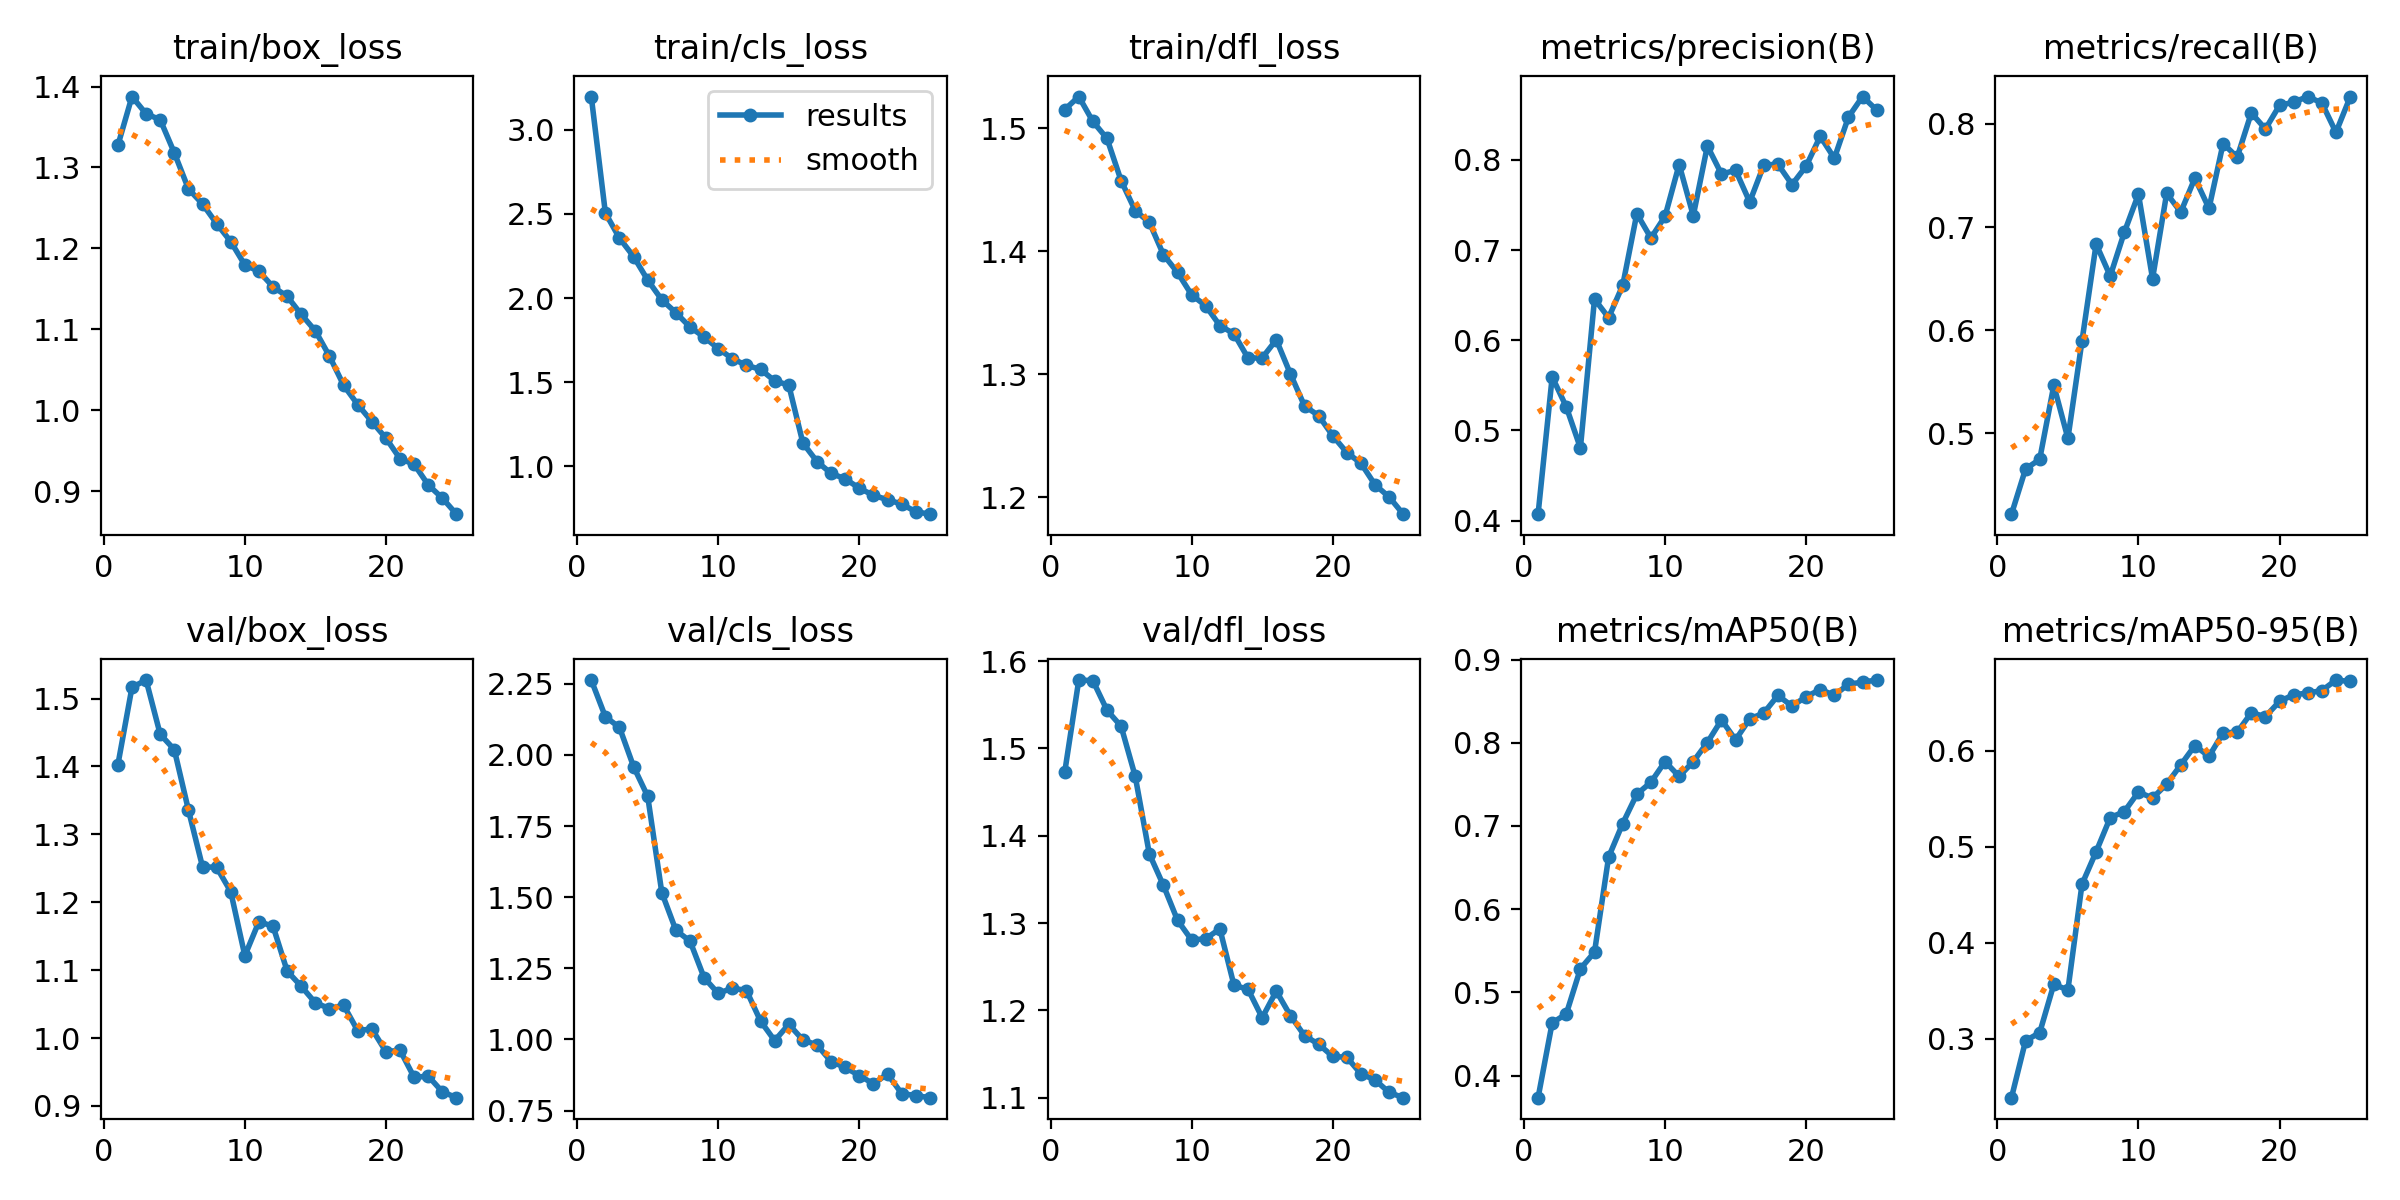

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/kaggle/working


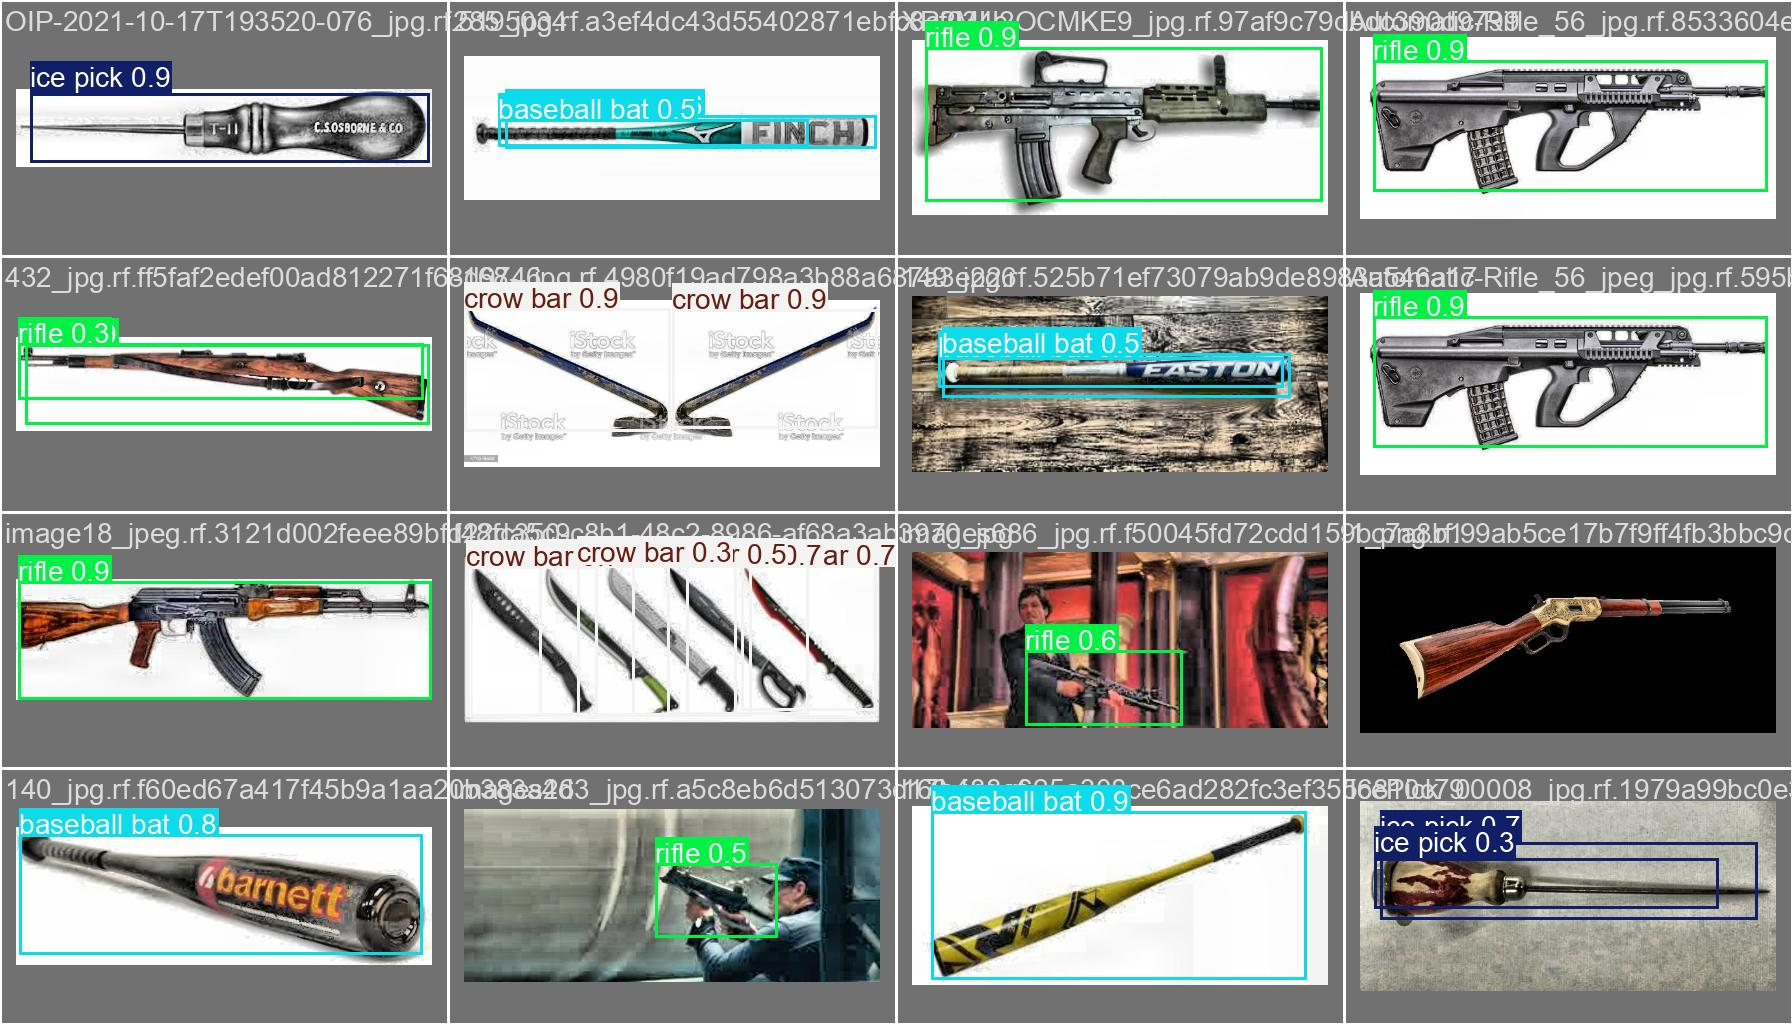

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [10]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics 8.3.79 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /kaggle/working/datasets/thirdvision-with-blunt-objects-without-su
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 135, len(boxes) = 672. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        579        672      0.838      0.824      0.876      0.677
            background         13         13      0.814          1      0.995      0.995
          baseball bat         58         82      0.845       0.72      0.825      0.674
              crow bar         54         67       0.88      0.866      0.934      0.732
                hammer       

## Inference with Custom Model

In [11]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.70 source={dataset.location}/test/images save=True

/kaggle/working
Ultralytics 8.3.79 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs

image 1/289 /kaggle/working/datasets/thirdvision-with-blunt-objects-without-sumpak-1/test/images/-183-_jpg.rf.2ec46b9784e02adb3a3d24e53f6ea4e0.jpg: 416x416 1 crow bar, 12.6ms
image 2/289 /kaggle/working/datasets/thirdvision-with-blunt-objects-without-sumpak-1/test/images/-186-_jpg.rf.ce05865b14415618dd4dc55d4b303837.jpg: 416x416 1 crow bar, 12.1ms
image 3/289 /kaggle/working/datasets/thirdvision-with-blunt-objects-without-sumpak-1/test/images/-211-_jpg.rf.a2118aea737e1655e15bcbc86a7b8577.jpg: 416x416 (no detections), 12.5ms
image 4/289 /kaggle/working/datasets/thirdvision-with-blunt-objects-without-sumpak-1/test/images/-215-_jpg.rf.487aff5521225df791061be1d5ba9930.jpg: 416x416 1 crow bar, 11.2ms
image 5/289 /kaggle/working/datasets/thirdvision-with-blunt-objects-without-sumpak-1/test/images/-219-_jpg.rf.f84

**NOTE:** Let's take a look at few results.

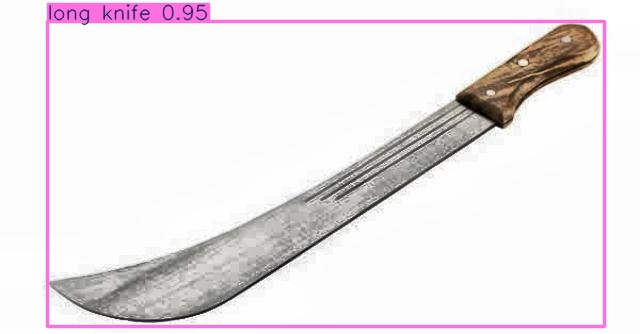

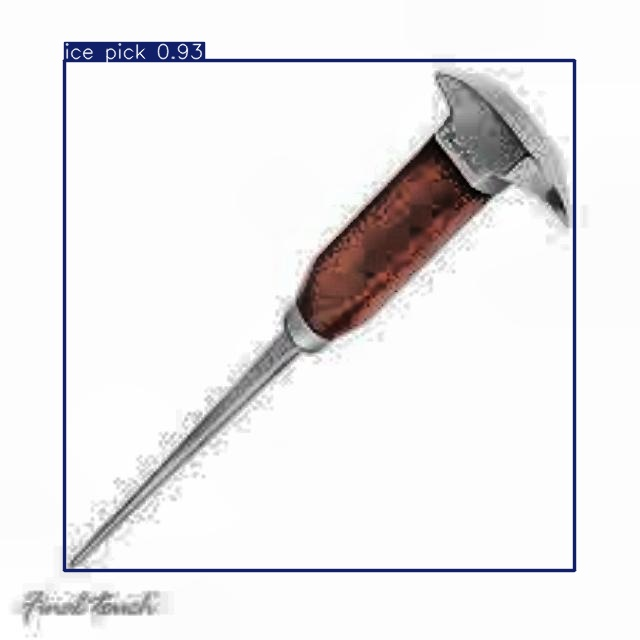

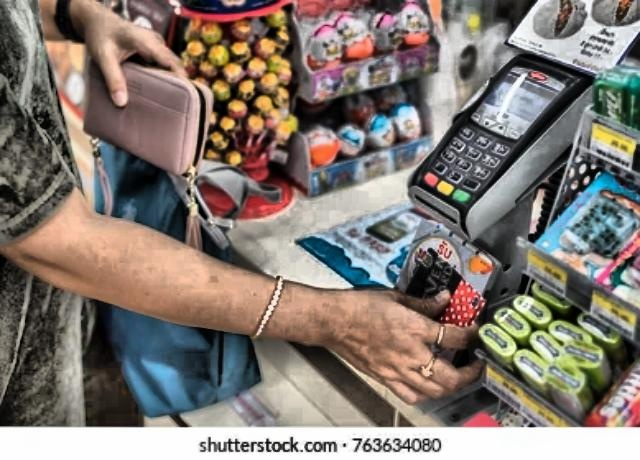

In [12]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/kaggle/working/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")